In [12]:
# hide
from pathlib import Path
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# hide
DATA_DIR = Path('data')
def load(filename):
    f = open(DATA_DIR/filename,"rb")
    return pickle.load(f)
    
def save(data, filename):
    with open(DATA_DIR/filename, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

party_colors = {
  'CDA':'#5cb957',
  'ChristenUnie':'#00a5e8',
  'D66':'#04a438',
  'GroenLinks':'#48a641',
  'PVV':'#002759',
  'PvdA':'#df111a',
  'PvdD':'#006b2d',
  'SGP':'#d86120',
  'SP':'#e3001b',
  'VVD':'#ff7f0e',
  'DENK':'#17becf',
  'FVD':'#800000',
  'Groep Krol/vKA':'pink',
  '50PLUS':'#93117e'}

parties = ['VVD',
 'CDA',
 'ChristenUnie',
 'D66',
 'SGP',
 'FVD',
 '50PLUS',
 'PVV',
 'PvdA',
 'DENK',
 'GroenLinks',
 'SP',
 'PvdD']

party_size = {'VVD':34,
 'CDA':15,
 'ChristenUnie':5,
 'D66':24,
 'SGP':3,
 'FVD':8,
 '50PLUS':1,
 'PVV':17,
 'PvdA':9,
 'DENK':3,
 'GroenLinks':8,
 'SP':9,
 'PvdD':6}

party_size = {k: v*100 for k,v in party_size.items()}

# parties = [ 'PvdA',
#  'GroenLinks',
#  'SP',
#  'PvdD']

In [14]:
# hide
df = load('df_including_topics_full.pickle')

In [15]:
df = df[df['Kamer']=='Rutte III']
len(df)

11448

In [16]:
df = df[df['Voor']!=150]
len(df)

9879

In [17]:
parties = [ 'VVD',
 'D66',
 'CDA',
 'ChristenUnie']

In [18]:
source = pd.DataFrame([(p1,p2,get_same_vote_percentage(p1,p2)) for p1 in parties for p2 in parties])


In [19]:
import altair as alt
base = alt.Chart(source)
chart = base.mark_rect().encode(
    alt.X('0:N',sort=parties,axis=alt.Axis(title=None)),
    alt.Y('1:N', sort=parties,axis=alt.Axis(title=None) ),
    color=alt.Color("2:Q", 
                      scale = alt.Scale(scheme="greens"), legend=alt.Legend(title='overeenkomst%', orient='top')),
)
text = base.mark_text(baseline='middle', color='black').encode(
    alt.X('0:N', sort=parties),
    alt.Y('1:N', sort=parties),
    alt.Text('2:N'))

chart + text

alt.LayerChart(...)

In [61]:
len([party_size[n] for n in G.nodes()])

9

In [75]:
get_same_vote_percentage('FVD','PVV')

69

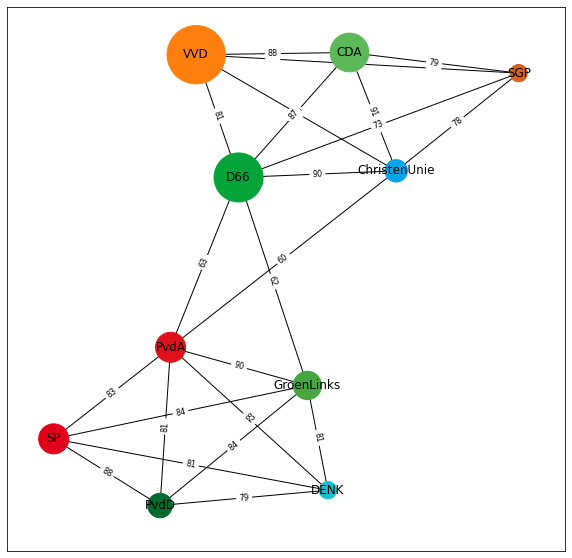

In [91]:
G = nx.Graph()

def get_same_vote_percentage(party1, party2):
    return round(sum(df['Stem_'+party1]==df['Stem_'+party2]) / len(df)*100)
for p1 in parties:
    for p2 in parties:
        if p1 != p2:
            # if p1 == 'GroenLinks' and p2 == 'SP': G.add_edge(p1,p2, weight=1)
            # else:
            same_vote = get_same_vote_percentage(p1,p2)
            if same_vote >= 60:
                G.add_edge(p1,p2,weight=same_vote, len=1/(same_vote-0) )
G.add_nodes_from(parties)
G.remove_nodes_from(['FVD', 'PVV','50PLUS' ])
color_map = [party_colors[node] for node in G]

pos = nx.nx_agraph.graphviz_layout(G,prog='neato', args ='')

# pos=nx.spring_layout(G, fixed=None, scale=0.7, center = (0,0)) # pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(10,10))
# plt.xlim([-100, 100])
# plt.ylim([-100, 100])
nx.draw_networkx(G, pos,font_size=12, node_color=color_map, node_size=[party_size[n] for n in G.nodes()])
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.5, font_size=8)
plt.margins(0.1,0.1)
plt.gcf()
plt.savefig('links_relaties.png')
# plt.draw()

In [21]:
overall_topic_counts = df['Topic'].value_counts()
def get_disagreement_topics(party1, party2):
    print('\n',party1,party2)
    print((df[df['Stem_'+party1]!=df['Stem_'+party2]]['Topic'].value_counts() / overall_topic_counts).sort_values()[-5:])
for p1 in parties:
    for p2 in parties:
        if p1 != p2 and p1<p2:
            get_disagreement_topics(p1,p2)


 D66 VVD
Algemene zaken          0.224189
Buitenlandse zaken      0.230496
Milieu & regelgeving    0.237097
Openbaar vervoer        0.259494
Onderwijs               0.277966
Name: Topic, dtype: float64

 CDA VVD
Algemene zaken          0.147493
Milieu & regelgeving    0.164516
Wonen                   0.168317
Financiele sector       0.176744
Onderwijs               0.181921
Name: Topic, dtype: float64

 CDA D66
Buitenlandse zaken          0.159574
Algemene zaken              0.163717
Onderwijs                   0.163842
Openbaar vervoer            0.174051
Landbouw & dierenwelzijn    0.195783
Name: Topic, dtype: float64

 CDA ChristenUnie
Algemene zaken              0.098820
Landbouw & dierenwelzijn    0.103916
Europese Unie               0.107335
Buitenlandse zaken          0.132388
Openbaar vervoer            0.139241
Name: Topic, dtype: float64

 ChristenUnie VVD
Onderwijs               0.201130
Financiele sector       0.218605
Buitenlandse zaken      0.219858
Milieu & regelgeving 

# Idee Boyana

In [23]:
parties = ['VVD',
 'CDA',
 'ChristenUnie',
 'D66',
 'SGP',
 'FVD',
 '50PLUS',
 'PVV',
 'PvdA',
 'DENK',
 'GroenLinks',
 'SP',
 'PvdD']

In [24]:
chambers = list(df['Kamer'].unique())
medeindiener_perc = pd.DataFrame({})
for chamber in chambers:
    moties_in_year = df.loc[(df['Kamer'] == chamber)]
    moties_in_year = moties_in_year.dropna(axis=1, how='all')
    indieners = [c for c in moties_in_year.columns if 'Indiener' in c and c != 'Indiener_persoon']
    medeindieners = [c for c in moties_in_year.columns if 'Medeindiener' in c and c != 'Medeindiener_persoon']
    stem = ['Stem_'+c[13:] for c in medeindieners]
    assert len(stem) == len(medeindieners)
    for p in indieners:
        partij_moties =  moties_in_year.loc[(moties_in_year[p]==1)]
        res = (partij_moties[medeindieners].sum() / partij_moties[stem].notna().sum().values)
        res = pd.DataFrame({'support':res.index.str[13:],'percentage':res.values, 'mede':partij_moties[medeindieners].sum(), 'stem':partij_moties[stem].notna().sum().values})
        res['partij']= p[9:]
        res['kamer']= chamber
        # how often did the party cosign & vote / how often did the party vote
        res2 =partij_moties[medeindieners].values * partij_moties[stem].values
        res2 = pd.DataFrame({'support': [s[5:] for s in stem], 'percentage':np.nansum(res2, axis=0)/partij_moties[stem].notna().sum().values})
        res2['partij']= p[9:]
        res2['kamer']= chamber
        medeindiener_perc = medeindiener_perc.append(res2)  

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [25]:
medeindiener_perc.head()

,support,percentage,partij,kamer
0,50PLUS,0.102210,50PLUS,Rutte III
1,CDA,0.019337,50PLUS,Rutte III
2,ChristenUnie,0.011050,50PLUS,Rutte III
3,D66,0.016575,50PLUS,Rutte III
4,DENK,0.049861,50PLUS,Rutte III


In [26]:
# hide_input
import altair as alt
medeindiener_perc = medeindiener_perc[medeindiener_perc['support'].isin(parties)]
medeindiener_perc = medeindiener_perc[medeindiener_perc['partij'].isin(parties)]

chart = alt.Chart(medeindiener_perc).mark_rect().encode(
    x=alt.X('partij:N', sort=list(parties)),
    y=alt.Y('support:N', sort=list(parties)),    
    color=alt.Color('percentage', scale=alt.Scale(scheme='greens'),
    legend=alt.Legend(orient="right",format='%'))
).transform_filter(alt.FieldOneOfPredicate(field='kamer', oneOf=['Rutte III'])).properties(height=200,width=200)

chart.encoding.y.title = 'mede-ingediend door'
chart.encoding.x.title = 'motie ingediend door'
chart

alt.Chart(...)

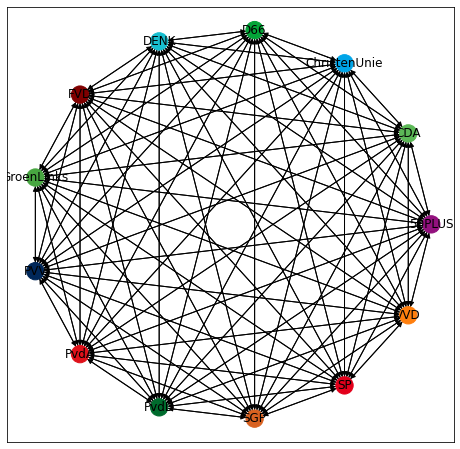

In [27]:
G = nx.DiGraph()
for _,info in medeindiener_perc.iterrows():
    p1, weight, p2, _ = info
    G.add_edge(p1,p2,weight=round(weight*100))
color_map = [party_colors[node] for node in G]

pos=nx.circular_layout(G, scale=0.9, center = (0,0)) # pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(8,8))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
nx.draw_networkx(G, pos, node_color=color_map)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.3)
# plt.gcf()
# plt.savefig('links_relaties.png')

In [51]:
party_size = {'VVD':34,
 'CDA':15,
 'ChristenUnie':5,
 'D66':24,
 'SGP':3,
 'FVD':8,
 '50PLUS':1,
 'PVV':17,
 'PvdA':9,
 'DENK':3,
 'GroenLinks':8,
 'SP':9,
 'PvdD':6}
for rem in ['FVD', 'PVV', 'DENK', '50PLUS']:
    del party_size[rem]
party_size = {k: v*100 for k,v in party_size.items()}

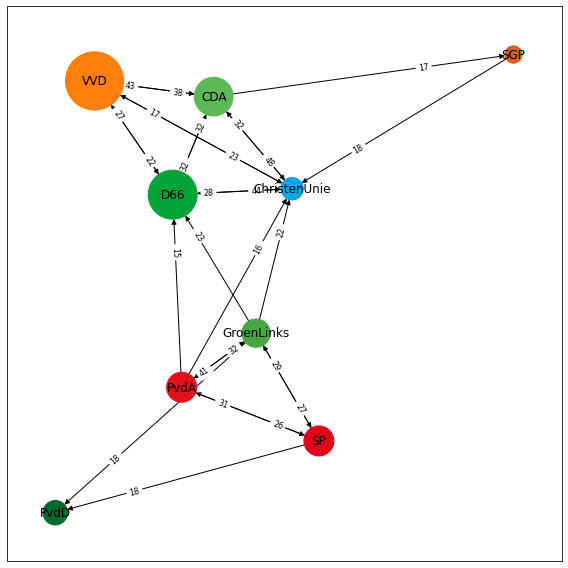

In [88]:
G = nx.DiGraph()
for p in parties:
    G.add_node(p,height=.30,width=.1)
for _,info in medeindiener_perc.iterrows():
    p1, weight, p2, _ = info
    G.add_node(p1)
    if weight > 0.15:    
        G.add_edge(p1,p2, weight=round(weight*100),  len=1/round(weight*100))
    # G.add_edge("SGP","VVD", weight=1,  len=1)
G.remove_nodes_from(['FVD', 'PVV', 'DENK', '50PLUS'])
color_map = [party_colors[node] for node in G]

for graphviz_type in ['neato']:
    pos = nx.nx_agraph.graphviz_layout(G,prog=graphviz_type, args ='')
    plt.figure(figsize=(8,8))
    nx.draw_networkx(G, pos, node_color=color_map, node_size=[party_size[n] for n in G.nodes()])
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=8,label_pos=0.3)
    
        
    plt.tight_layout()
    # plt.show()
    plt.gcf()
    plt.savefig('network.png')

In [53]:
stem_perc = pd.DataFrame({})
for chamber in chambers:
    moties_in_year = df.loc[(df['Kamer'] == chamber)]
    moties_in_year = moties_in_year.dropna(axis=1, how='all')
    indieners = [c for c in moties_in_year.columns if 'Indiener' in c]
    stem = [c for c in moties_in_year.columns if 'Stem' in c][1:]
    
    for p in indieners:
        partij_moties =  moties_in_year.loc[(moties_in_year[p]==1)] 
        
        partij_moties = partij_moties.replace(-1,0)
        res = (partij_moties[stem].sum()/partij_moties[stem].notna().sum())
        res = pd.DataFrame({'support':res.index.str[5:],'percentage':res.values})
        res['partij']= p[9:]
        res['kamer'] = chamber
        stem_perc = stem_perc.append(res)
stem_perc = stem_perc[stem_perc['support'].isin(parties)]
stem_perc = stem_perc[stem_perc['partij'].isin(parties)]
stem_perc.head()

,support,percentage,partij,kamer
0,50PLUS,1.000000,50PLUS,Rutte III
1,CDA,0.267956,50PLUS,Rutte III
2,ChristenUnie,0.301105,50PLUS,Rutte III
3,D66,0.262431,50PLUS,Rutte III
4,DENK,0.864266,50PLUS,Rutte III


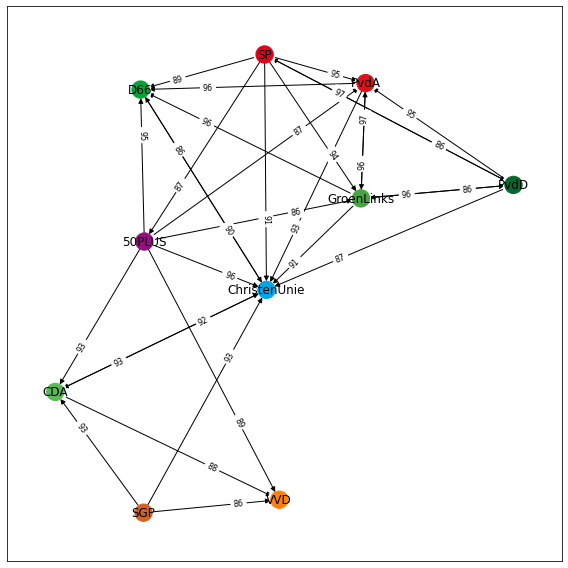

In [54]:
# hide_input

G = nx.DiGraph()
for _,info in stem_perc.iterrows():
    p1, weight, p2, _ = info
    G.add_node(p1)
    if weight > 0.85:    
        G.add_edge(p1,p2, weight=round(weight*100),  len=1/round(weight*100))
    # G.add_edge("SGP","VVD", weight=1,  len=1)
G.remove_nodes_from(['FVD', 'PVV', 'DENK'])
color_map = [party_colors[node] for node in G]

for graphviz_type in ['neato']:
    pos = nx.nx_agraph.graphviz_layout(G,prog=graphviz_type, args ='')
    plt.figure(figsize=(8,8))
    nx.draw_networkx(G, pos, node_color=color_map)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=8,label_pos=0.3)
    
        
    plt.tight_layout()
    plt.show()
    # plt.gcf()
    # plt.savefig('network.png')